# MAiWDZD - Tutorial 1 (03.04)
# Użycie narzędzi scikit-learn do wizualizacji małych zbiorów danych - PCA

In [2]:
# imports
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import NearestNeighbors
import sklearn.datasets as dts
import seaborn as sns

In [29]:
def display_hist(variance, number_of_components=None, percentage=False):
    total = sum(variance)
    bar_heights = variance[:number_of_components]
    
    plt.figure()
    plt.xlabel("Components")
    if percentage:
        bar_heights = list(map(lambda x: x * 100 / total, bar_heights))
        plt.ylabel("[%]")

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return

def display_heatmap(loadings, xlabels, colormap):
    ylabels = ['PC ' + str(i) for i in range(1, len(loadings) + 1)]
    plt.figure()
    sns.heatmap(loadings, cmap=colormap, yticklabels=ylabels, xticklabels=xlabels)
    plt.show()

def knearestneighbors(x, y, k):    
    n = NearestNeighbors(k, algorithm='auto').fit(x)
    distances, indices = n.kneighbors(x)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: y[neighbour] == y[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)) / k)
        
    return neighbour_stats

In [4]:
%matplotlib notebook

## Tutorial

In [5]:
# zbiór prosty
easy = dts.load_wine(True)

easy_x = np.stack(easy[0])
easy_y = easy[1]

## przeskalowanie danych
easy_x = StandardScaler().fit_transform(easy_x)
easy_x.shape

(178, 13)

In [6]:
# zbiór trudny
# źródło: https://archive.ics.uci.edu/ml/datasets/wholesale+customers
hard_path = 'wholesale_customers_data.csv'

hard_x = pandas.read_csv(hard_path, sep=',')
hard_x.pop('Region')
hard_y = hard_x.pop('Channel')

## przeskalowanie danych
hard_x = StandardScaler().fit_transform(hard_x)
hard_x.shape

(440, 6)

### 1. PCA dla zbioru łatwego

<IPython.core.display.Javascript object>


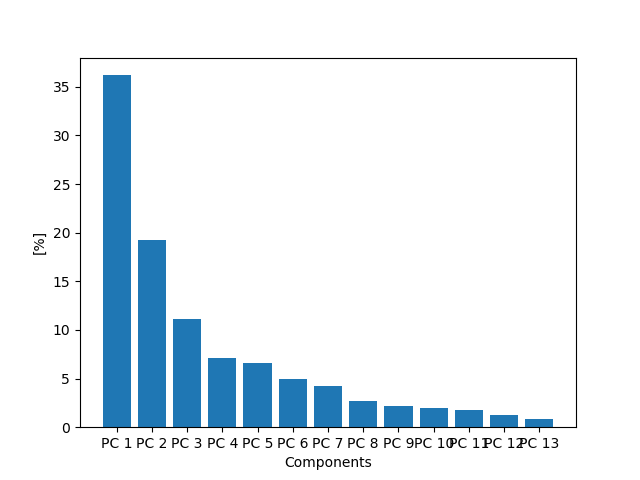

In [7]:
# PCA
epca = PCA(n_components = 13)
epca_x = epca.fit_transform(easy_x)

# histogram
display_hist(epca.explained_variance_, 13, True)

<IPython.core.display.Javascript object>


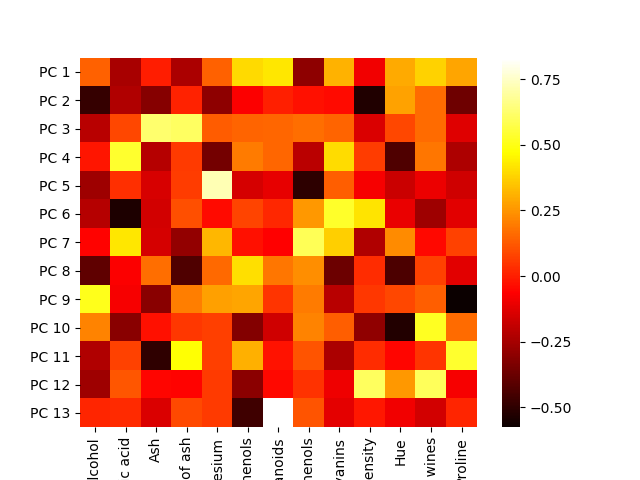

In [8]:
# wagi w wektorach własnych
e_categories = ('Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
             'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline')

display_heatmap(epca.components_, e_categories, 'hot')

<IPython.core.display.Javascript object>


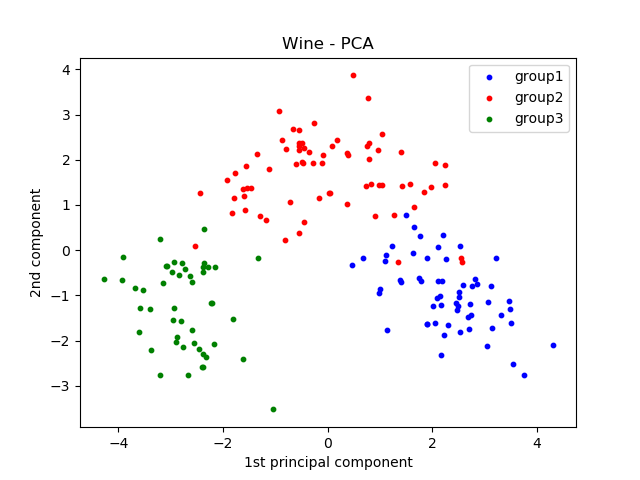

In [10]:
# wykres 2D
plt.figure()

plt.scatter(epca_x[easy_y == 0, 0], epca_x[easy_y == 0, 1], c='blue', s=10, label='group1')
plt.scatter(epca_x[easy_y == 1, 0], epca_x[easy_y == 1, 1], c='red', s=10, label='group2')
plt.scatter(epca_x[easy_y == 2, 0], epca_x[easy_y == 2, 1], c='green', s=10, label='group3')

plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.title("Wine - PCA")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


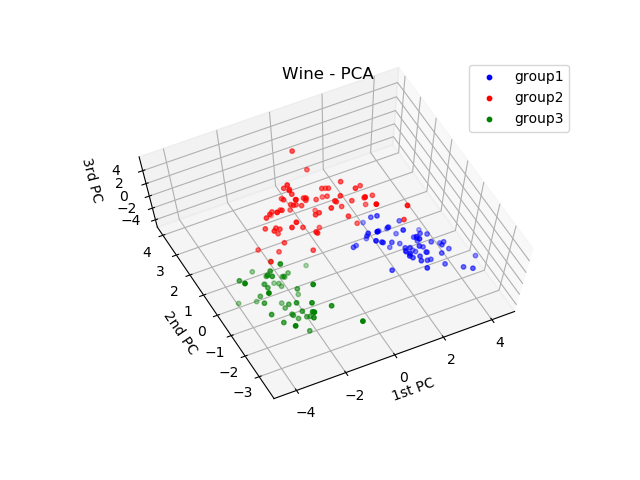

In [11]:
# wykres 3D
plt.figure()
ax = plt.subplot(111, projection='3d')

ax.scatter(epca_x[easy_y == 0, 0], epca_x[easy_y == 0, 1], epca_x[easy_y == 0, 2], c='blue', s=10, label='group1')
ax.scatter(epca_x[easy_y == 1, 0], epca_x[easy_y == 1, 1], epca_x[easy_y == 1, 2], c='red',   s=10, label='group2')
ax.scatter(epca_x[easy_y == 2, 0], epca_x[easy_y == 2, 1], epca_x[easy_y == 2, 2], c='green', s=10, label='group3')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
#ax.view_init(30, 30)

plt.title("Wine - PCA")
plt.legend()
plt.show()

### 2. PCA dla zbioru trudnego

<IPython.core.display.Javascript object>


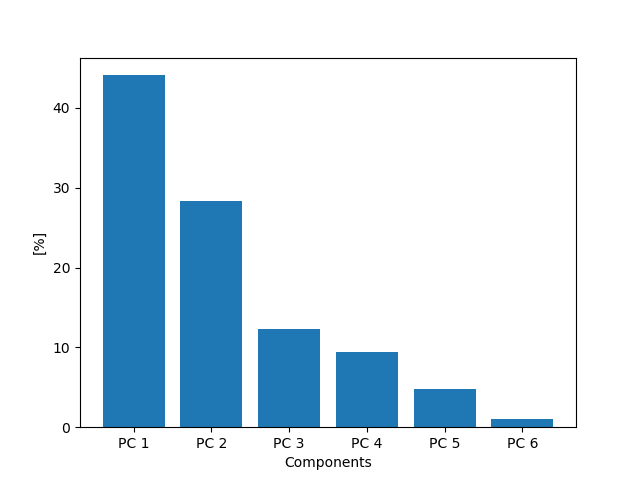

In [12]:
# PCA
hpca = PCA(n_components = 6)
hpca_x = hpca.fit_transform(hard_x)

# histogram
display_hist(hpca.explained_variance_, 6, True)

<IPython.core.display.Javascript object>


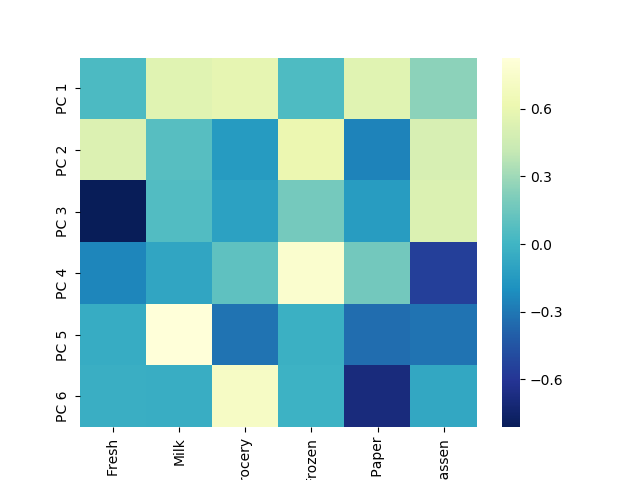

In [13]:
# wagi w wektorach własnych
h_categories = ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Det & Paper', 'Delicassen')

display_heatmap(hpca.components_, h_categories, 'YlGnBu_r')

<IPython.core.display.Javascript object>


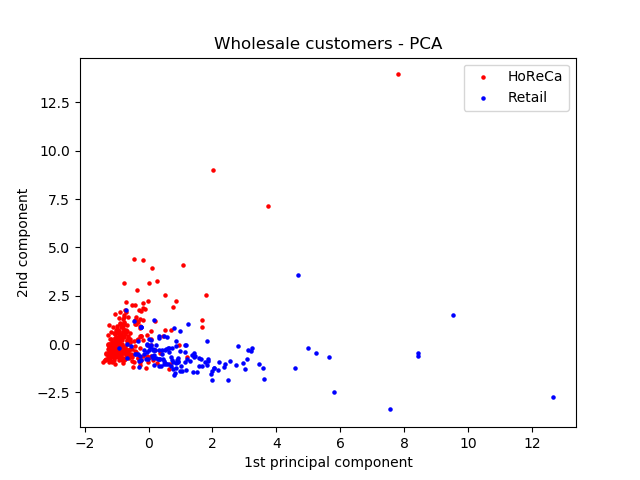

<function matplotlib.pyplot.show>

In [14]:
# wykres 2D
plt.figure()

plt.scatter(hpca_x[hard_y == 1, 0], hpca_x[hard_y == 1, 1], c='red', s=5, label='HoReCa')
plt.scatter(hpca_x[hard_y == 2, 0], hpca_x[hard_y == 2, 1], c='blue', s=5, label='Retail')
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.title("Wholesale customers - PCA")
plt.legend()
plt.show

<IPython.core.display.Javascript object>


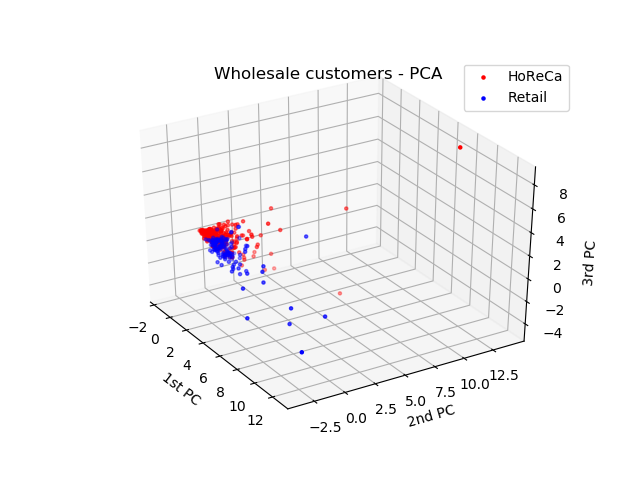

In [15]:
# wykres 3D
plt.figure()
ax = plt.subplot(111, projection='3d')

ax.scatter(hpca_x[hard_y == 1, 0], hpca_x[hard_y == 1, 1], hpca_x[hard_y == 1, 2], c='red', s=5, label='HoReCa')
ax.scatter(hpca_x[hard_y == 2, 0], hpca_x[hard_y == 2, 1], hpca_x[hard_y == 2, 2], c='blue', s=5, label='Retail')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")

plt.title("Wholesale customers - PCA")
plt.legend()
plt.show()

### 3. kPCA dla zbioru łatwego

In [16]:
# kpca
ekpca = KernelPCA(n_components=13, fit_inverse_transform=True, kernel='rbf', gamma=0.1) # check gamma
ekpca_x = ekpca.fit_transform(easy_x)

<IPython.core.display.Javascript object>


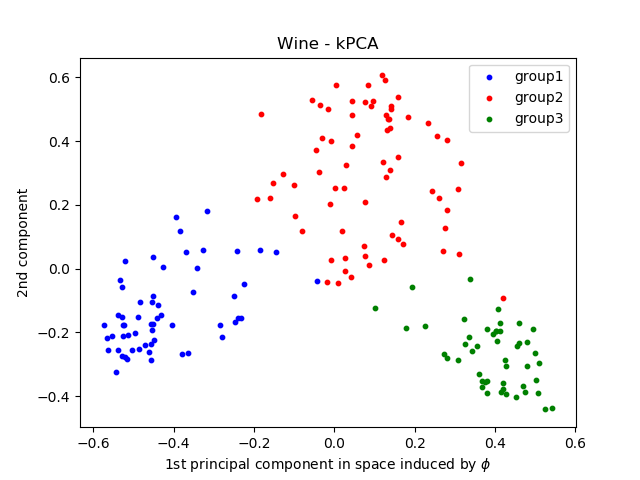

In [17]:
# wykres 2D
plt.figure()

plt.scatter(ekpca_x[easy_y == 0, 0], ekpca_x[easy_y == 0, 1], c='blue', s=10, label='group1')
plt.scatter(ekpca_x[easy_y == 1, 0], ekpca_x[easy_y == 1, 1], c='red', s=10, label='group2')
plt.scatter(ekpca_x[easy_y == 2, 0], ekpca_x[easy_y == 2, 1], c='green', s=10, label='group3')
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.title("Wine - kPCA")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


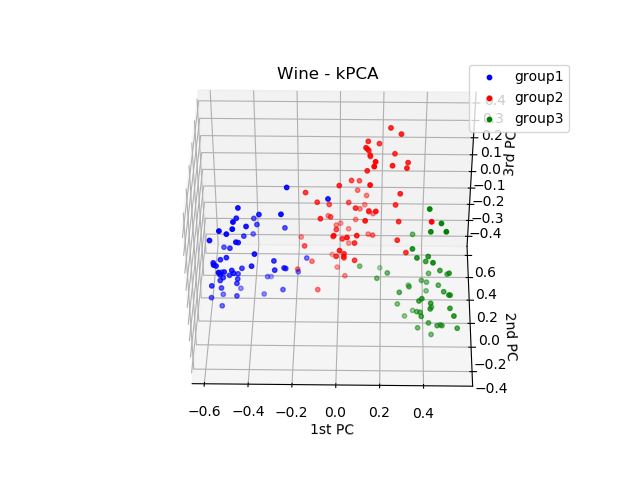

In [18]:
# wykres 3D
plt.figure()
ax = plt.subplot(111, projection='3d')

ax.scatter(ekpca_x[easy_y == 0, 0], ekpca_x[easy_y == 0, 1], ekpca_x[easy_y == 0, 2], c='blue', s=10, label='group1')
ax.scatter(ekpca_x[easy_y == 1, 0], ekpca_x[easy_y == 1, 1], ekpca_x[easy_y == 1, 2], c='red',   s=10, label='group2')
ax.scatter(ekpca_x[easy_y == 2, 0], ekpca_x[easy_y == 2, 1], ekpca_x[easy_y == 2, 2], c='green', s=10, label='group3')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
#ax.view_init(30, 30)

plt.title("Wine - kPCA")
plt.legend()
plt.show()

### 4. kPCA dla zbioru trudnego

In [19]:
# kpca
hkpca = KernelPCA(n_components=6, fit_inverse_transform=True, kernel='rbf', gamma=0.2)
hkpca_x = hkpca.fit_transform(hard_x)

<IPython.core.display.Javascript object>


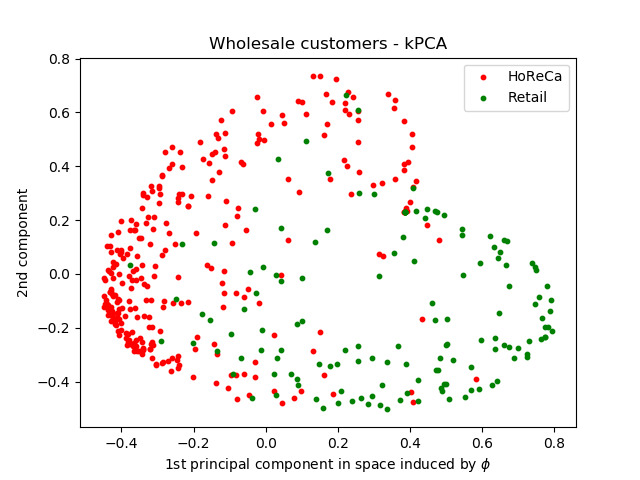

In [20]:
# wykres 2D
plt.figure()

plt.scatter(hkpca_x[hard_y == 1, 0], hkpca_x[hard_y == 1, 1], c='red', s=10, label='HoReCa')
plt.scatter(hkpca_x[hard_y == 2, 0], hkpca_x[hard_y == 2, 1], c='green', s=10, label='Retail')
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.title("Wholesale customers - kPCA")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


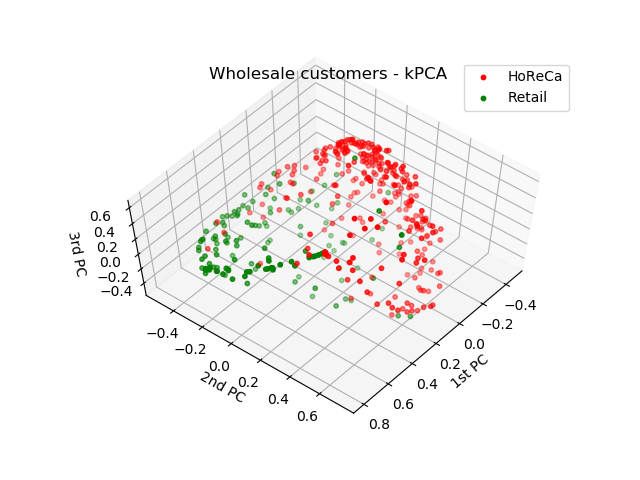

In [21]:
# wykres 3D
plt.figure()
ax = plt.subplot(111, projection='3d')

ax.scatter(hkpca_x[hard_y == 1, 0], hkpca_x[hard_y == 1, 1], hkpca_x[hard_y == 1, 2], c='red',   s=10, label='HoReCa')
ax.scatter(hkpca_x[hard_y == 2, 0], hkpca_x[hard_y == 2, 1], hkpca_x[hard_y == 2, 2], c='green', s=10, label='Retail')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
#ax.view_init(30, 30)

plt.title("Wholesale customers - kPCA")
plt.legend()
plt.show()

### 5. Metryka

In [33]:
# prosty zbiór
stats = knearestneighbors(easy_x, easy_y, 5)
print('orginal data:', round(np.mean(stats), 3))

stats = knearestneighbors(epca_x, easy_y, 5)
print('pca, all components: ', round(np.mean(stats), 3))

stats = knearestneighbors(ekpca_x[:, :6], easy_y, 5)
print('kpca, all components: ', round(np.mean(stats), 3))

stats = knearestneighbors(epca_x[:, :6], easy_y, 5)
print('pca, 6 components: ', round(np.mean(stats), 3))

stats = knearestneighbors(ekpca_x[:, :6], easy_y, 5)
print('kpca, 6 components: ', round(np.mean(stats), 3))

('orginal data:', 0.876)
('pca, all components: ', 0.876)
('kpca, all components: ', 0.899)
('pca, 6 components: ', 0.882)
('kpca, 6 components: ', 0.899)


In [34]:
# trudny zbiór
stats = knearestneighbors(hard_x, hard_y, 5)
print('orginal data:', round(np.mean(stats), 3))

stats = knearestneighbors(hpca_x, hard_y, 5)
print('pca, all components: ', round(np.mean(stats), 3))

stats = knearestneighbors(hkpca_x, hard_y, 5)
print('kpca, all components: ', round(np.mean(stats), 3))

stats = knearestneighbors(hpca_x[:, :2], hard_y, 5)
print('pca, 2 components: ', round(np.mean(stats), 3))

stats = knearestneighbors(hkpca_x[:, :2], hard_y, 5)
print('kpca, 2 components: ', round(np.mean(stats), 3))

('orginal data:', 0.816)
('pca, all components: ', 0.816)
('kpca, all components: ', 0.689)
('pca, 2 components: ', 0.711)
('kpca, 2 components: ', 0.623)


## Zadanie

In [ ]:
# pobranie danych - zbiór łatwy
easy_ex = dts.load_breast_cancer(True)
easy_ex_y = easy_ex[1]
easy_ex_x = easy_ex[0]
easy_ex_x = StandardScaler().fit_transform(easy_ex_x)
easy_ex_x.shape

In [ ]:
# pobranie danych - zbiór trudny
hard_ex = dts.load_digits(10, True)
hard_ex_y = hard_ex[1]
hard_ex_x = hard_ex[0]
hard_ex_x = StandardScaler().fit_transform(hard_ex_x)
hard_ex_x.shape

### 1. PCA dla zbioru łatwego

In [ ]:
# wartości y = {0, 1}

In [ ]:
# pca

# histogram


In [ ]:
# wykres 2D i 3D


### 2. PCA dla zbioru trudnego

In [ ]:
# cyfry, które należy wyświetlić w ramach trudnego ćwiczenia PCA/kPCA (wartości y)
# zestaw 1: 0 3 8
# zestaw 2: 1 4 7
# zestaw 3: 2 5 9
# zestaw 4: 1 3 8

In [ ]:
# pca

# histogram

In [ ]:
# wykres 2D i 3D


### 3. kPCA dla zbioru łatwego

In [ ]:
# kpca


In [ ]:
# wykres 2D i 3D


### 4. kPCA dla zbioru trudnego

In [ ]:
# kpca


In [ ]:
# wykres 2D i 3D
